In [1]:
# 1. 데이터 준비

from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드 
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 데이터 shpae 확인
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

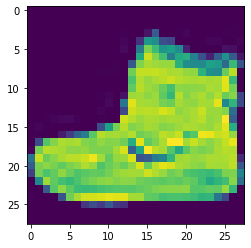

In [4]:
plt.imshow(train_data[0])

In [5]:
train_label[0]

9

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
# DNN 입력값에 reshape
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

In [9]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [10]:
from tensorflow.keras import models, layers

In [12]:
# 모델 설계

# model = model.Sequential()
# model.add 
# ...
model = models.Sequential([ 
  layers.Dense(units=512, activation='relu', input_shape=(28 * 28, )),
  layers.Dense(units=10, activation='softmax')
])

In [13]:
# 모델 구성
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 학습 설정
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 학습 후 결과 값 저장
history = model.fit(x=train_data,
          y=train_label,
          epochs=30,
          batch_size=128,
          validation_split=0.2
)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 17.8974 - accuracy: 0.7139 - val_loss: 1.3712 - val_accuracy: 0.7375
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.8001 - accuracy: 0.7957 - val_loss: 0.6179 - val_accuracy: 0.8295
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6659 - accuracy: 0.8180 - val_loss: 0.6186 - val_accuracy: 0.8279
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5941 - accuracy: 0.8313 - val_loss: 0.5420 - val_accuracy: 0.8428
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5986 - accuracy: 0.8408 - val_loss: 0.7198 - val_accuracy: 0.8282
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5723 - accuracy: 0.8465 - val_loss: 0.6045 - val_accuracy: 0.8428
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.8530 - val_loss: 0.6362 - val_accuracy: 0.8497
Epoch

In [18]:
# 성능 지표 추출
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
# 차트 x축
epochs = range(1, len(loss) + 1)

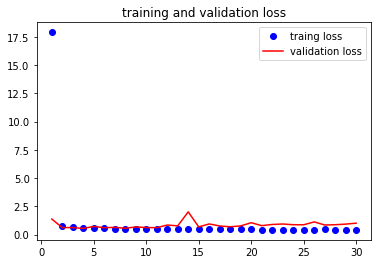

In [22]:
# loss 를 epochs에 따른 시각화
plt.plot(epochs, loss, 'bo', label='traing loss')
plt.plot(epcohs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

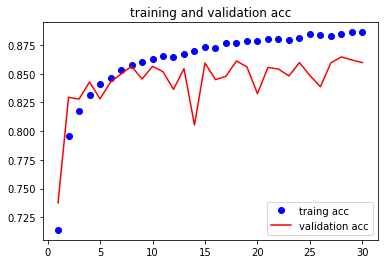

In [23]:
# accuracy 시각화
plt.plot(epochs, accuracy, 'bo', label='traing acc')
plt.plot(epcohs, val_acc, 'r', label='validation acc')
plt.title('training and validation acc')
plt.legend()

In [25]:
# 모델 성능 평가
model.evaluate(x=test_data, y=test_label)

313/313 [==============================] - 1s 2ms/step - loss: 1.0979 - accuracy: 0.8529


[1.0979456901550293, 0.8529000282287598]

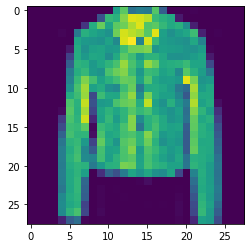

In [27]:
plt.imshow(test_data[10].reshape(28, 28))

In [29]:
print(class_names[test_label[10]])

Coat


In [43]:
# 학습된 모델에 10번째 데이터를 넣었을 때, 나오는 값을 확인
result = model.predict(test_data[10].reshape((1, 784)))

In [44]:
result

array([[9.9648046e-04, 6.3043340e-06, 2.0133595e-01, 1.2883035e-02,
        6.6492027e-01, 0.0000000e+00, 1.1821797e-01, 0.0000000e+00,
        1.6400458e-03, 0.0000000e+00]], dtype=float32)

In [46]:
import numpy as np

# 결과값 확인
result = np.argmax(result[0])

In [47]:
result

4

In [48]:
class_names[result]

'Coat'